<center> <h1>Algoritmo del gradiente descendente con t fijo</h1> </center>

<h2>Definición</h2>
<h4>Es un algoritmo que utiliza la dirección del gradiente para encontrar
puntos óptimos de la función objetivo.</h4>

<ol>
  <li>Dado un punto x en el dominio de $f(x)$ y un escalar $t$</li>
  <li>Repita mientras $||\nabla f(x_n)||_2 \geq \eta $
         <ul>
          <li>$\Delta x_n := -\nabla f(x_n)$</li>
          <li>$x_{n+1} := x_n + t \Delta x_n$</li>
      </ul> 
   </li>

</ol>

<h2>Ejercicio</h2>
<h4>Implemente el algoritmo para funciones bivariantes utilizando el
lenguaje de su preferencia y librerías matemáticas que incorporen
derivadas numéricas o el cálculo del gradiente.</h4>

In [1]:
import sympy
from sympy import*
import matplotlib.pyplot as plt

In [2]:
def functions(f: str):
    """
    If the input is a function, return it. Otherwise, convert it to a function

    :param f: the function to be integrated
    :type f: str
    :return: The function itself if it is a function, otherwise it is converted to a sympy function.
    """
    return f if isinstance(f, Function) else sympify(f)

In [3]:
def get_Symbols()->list:
    """
    It returns a list of two symbols, `x` and `y`
    :return: A list of two symbols, x and y.
    """
    return Symbol('x'), Symbol('y')

In [4]:
def get_Gradient(*args: any) -> list:
    """
    > The function `get_Gradient` takes in two arguments, `x` and `y`, and returns the gradient of the
    function `f` with respect to `x` and `y`
    
    :param : $
    :type : any
    :return: A Matrix of the partial derivatives of the function with respect to the variables.
    """
    if len(args) > 0: return Matrix([[diff(args[0], args[1])], [diff(args[0], args[2])]])

In [5]:
def get_Point(points: str) -> list:
    """
    It takes a string of comma separated numbers and returns a matrix of those numbers
    
    :param points: a string of comma-separated numbers ("x,y")
    :type points: str
    :return: A list of lists of floats.
    """
    return Matrix([ [float(point)] for point in points.split(',') ])

In [13]:
def desc_Gradient(point: list, gradient: list, t: float, n: float, *args:any) -> list:
    """
    The function takes in a point, a gradient, a step size, a tolerance, and a list of variables, and
    returns the point at which the gradient is less than the tolerance
    
    :param point: list, gradient: list, t: float, n: float, *args:any
    :type point: list
    :param gradient: the gradient of the function
    :type gradient: list
    :param t: step size
    :type t: float
    :param n: the norm of the gradient vector
    :type n: float
    :param : point is the starting point
    :type : any
    :return: The point at which the gradient is less than n.
    """
    dataT=[]
    gradient_vector = float(gradient.subs([(args[0], point[0]), (args[1], point[1])]).norm())
    while  gradient_vector >= n:
        gradient_vector = float(gradient.subs([(args[0], point[0]), (args[1], point[1])]).norm())
        delta_x_n = -1 * gradient.subs([(args[0], point[0]), (args[1], point[1])])
        point = point + t * (delta_x_n)
        dataT.append(point)
    return point,dataT

In [36]:
def barz_borw(tV,xV,yV,gradientV,etaV,x,y):
    '''
    This function take for parameters a scale value, (x,y) coordinates, its gradient, an eta value and the x,y symbols.
    :param tV: refers to the t value (scale value).
    :param xV: refers to x coordinate value.
    :param yV: refers to y coordinate value.
    :param gradientV: refers to the gradient of the function f(x,y).
    :param etaV: refers to eta value.
    :param x: refers to x symbol.
    :param y: refers to y symbol.
    :param oGr : refers to the old gradient or the first gradient calculated before reasignating t.
    :param nGr : refers to the new gradient value after reasignating t.
    :param dx : referst to the Δ𝑥𝑛:=−∇𝑓(𝑥𝑛) value.
    :param lwP :refers to the lowest part of the equation (||∇𝑓(𝑥𝑛)−∇𝑓(𝑥𝑛−1)||2)
    :return:   Return the  Barzilai-Borwein algorithm value  on the given data.
    '''
    dataTV=[]
    cords=Matrix([[float(xV)],[float(yV)]])
    while(float(gradientV.subs([(x,cords[0]),(y,cords[1])]).norm())>=etaV):
        oGr= gradientV.subs([(x,cords[0]),(y,cords[1])])
        dx= -tV * oGr
        cords=cords+dx
        nGr=gradientV.subs([(x,cords[0]),(y,cords[1])])
        lwP = nGr - oGr
        oGr = nGr
        tV = dx.dot(lwP) / lwP.dot(lwP)
        dataTV.append(cords)
    return [cords,dataTV]


In [37]:
def graph(pt ):
    x=pt[0]
    y=pt[1]
    print('x',x,'\n','y',y)
    """
    It takes a list of points and plots them on a graph
    
    :param Points: a array of the following:
    """
    plt.title('T')
    plt.plot(x, y, color="red", label="T fija")
    plt.legend()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()


In [40]:
def main():
    """
    It takes a function, a point, a scalar, and a number, and returns the gradient descent of the
    function at the point with the scalar and number
    """
    funcion = functions(str(input("Ingrese su función: ")))
    punto = get_Point(str(input("Ingrese un Punto (x,y): ")))
    n = float(input("Ingrese n (eta): "))
    t = float(input("Ingrese escalar t: "))
    x, y = get_Symbols()
    gradient = get_Gradient(funcion, x, y)
    desc = desc_Gradient(punto, gradient, t, n, x,y)
    barz=barz_borw(t,punto[0],punto[1],gradient,n,x,y)
    graph(desc[1])
    graph(barz[1])
    

Ingrese su función:  x**2+y**2+3*y+4*x
Ingrese un Punto (x,y):  4.0 , -3.0
Ingrese n (eta):  0.002
Ingrese escalar t:  0.1


x Matrix([[2.80000000000000], [-2.70000000000000]]) 
 y Matrix([[1.84000000000000], [-2.46000000000000]])


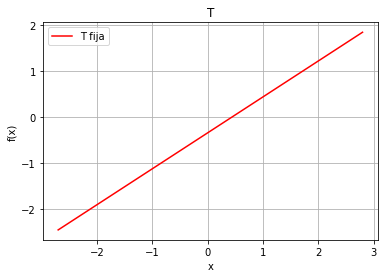

x Matrix([[2.80000000000000], [-2.70000000000000]]) 
 y Matrix([[-2.00000000000000], [-1.50000000000000]])


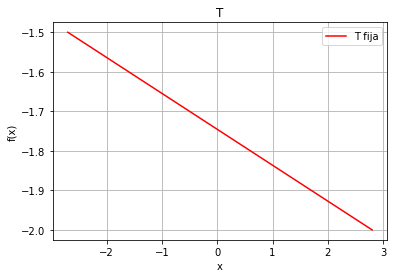

In [41]:
main()